In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Data = pd.read_csv('train.csv')

# Data preprocessing

In [40]:
numerical_features = []
categorical_features = []

In [41]:
#Seperating the numerical and categorical feature
for i in Data.columns:
    if Data[i].dtypes != 'object':
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [42]:
# checking there are any duplicate records or not
len(Data['Id']) == len(set(Data['Id']))

True

In [86]:
na_features = []
for clm in Data.columns:
    na_count = sum(Data[clm].isna())
    if na_count > 0.8*(Data.shape[0]):
        na_features.append(clm)
na_features

[]

In [64]:
# dropping the feature which have hihger nas
Data.drop(na_features, axis = 'columns',inplace = True)        

In [114]:
# Filling the na with mean value
na_features_1 = []
for clm in Data.columns:
    na_count = sum(Data[clm].isna())
    if na_count > 0:
        na_features_1.append(clm)
na_features_1

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [115]:
for i in na_features_1:
    if i in categorical_features:
        mode = Data[i].mode()
        Data[i].fillna(mode[0], inplace = True)
    else:
        mean = Data[i].mean()
        Data[i].fillna(mean, inplace = True)

In [116]:
# Filling the na with mean value
na_features_1 = []
for clm in Data.columns:
    na_count = sum(Data[clm].isna())
    if na_count > 0:
        na_features_1.append(clm)
na_features_1

[]

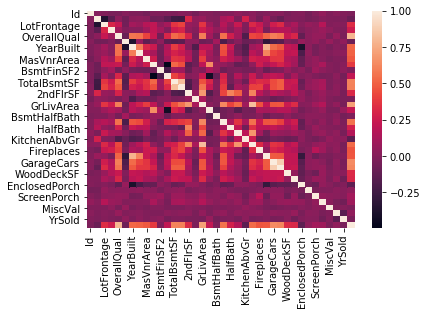

In [122]:
# Finding the correlation among the features
corr = Data.corr()
sns.heatmap(corr)